In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [1]:
import matplotlib.pyplot as plt #그래프 모듈 자주 사용해봄
import seaborn as sns # 처음봄
import missingno as msno # 결측치 시각화 할수있는거. 처음봄

# 데이터 불러오기

In [5]:
df = pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv",parse_dates = ['timestamp']) # df 자주 써봄
#parse_dates 시간 데이터 별도의 옵션을 통해 처리
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
# 데이;터의 타입과 구조
print('데이터의 구조:', df.shape) #17414행, 10열
print('데이터의 타입:', df.dtypes)
print('데이터의 column:', df.columns)
# 데이터 분석 시작시 데이터 구조, 타입 한번 보고 진행하시면 될거같아요

데이터의 구조: (17414, 10)
데이터의 타입: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 column: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [7]:
df.isna().sum() #결측치 확인, 결측치 없다.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

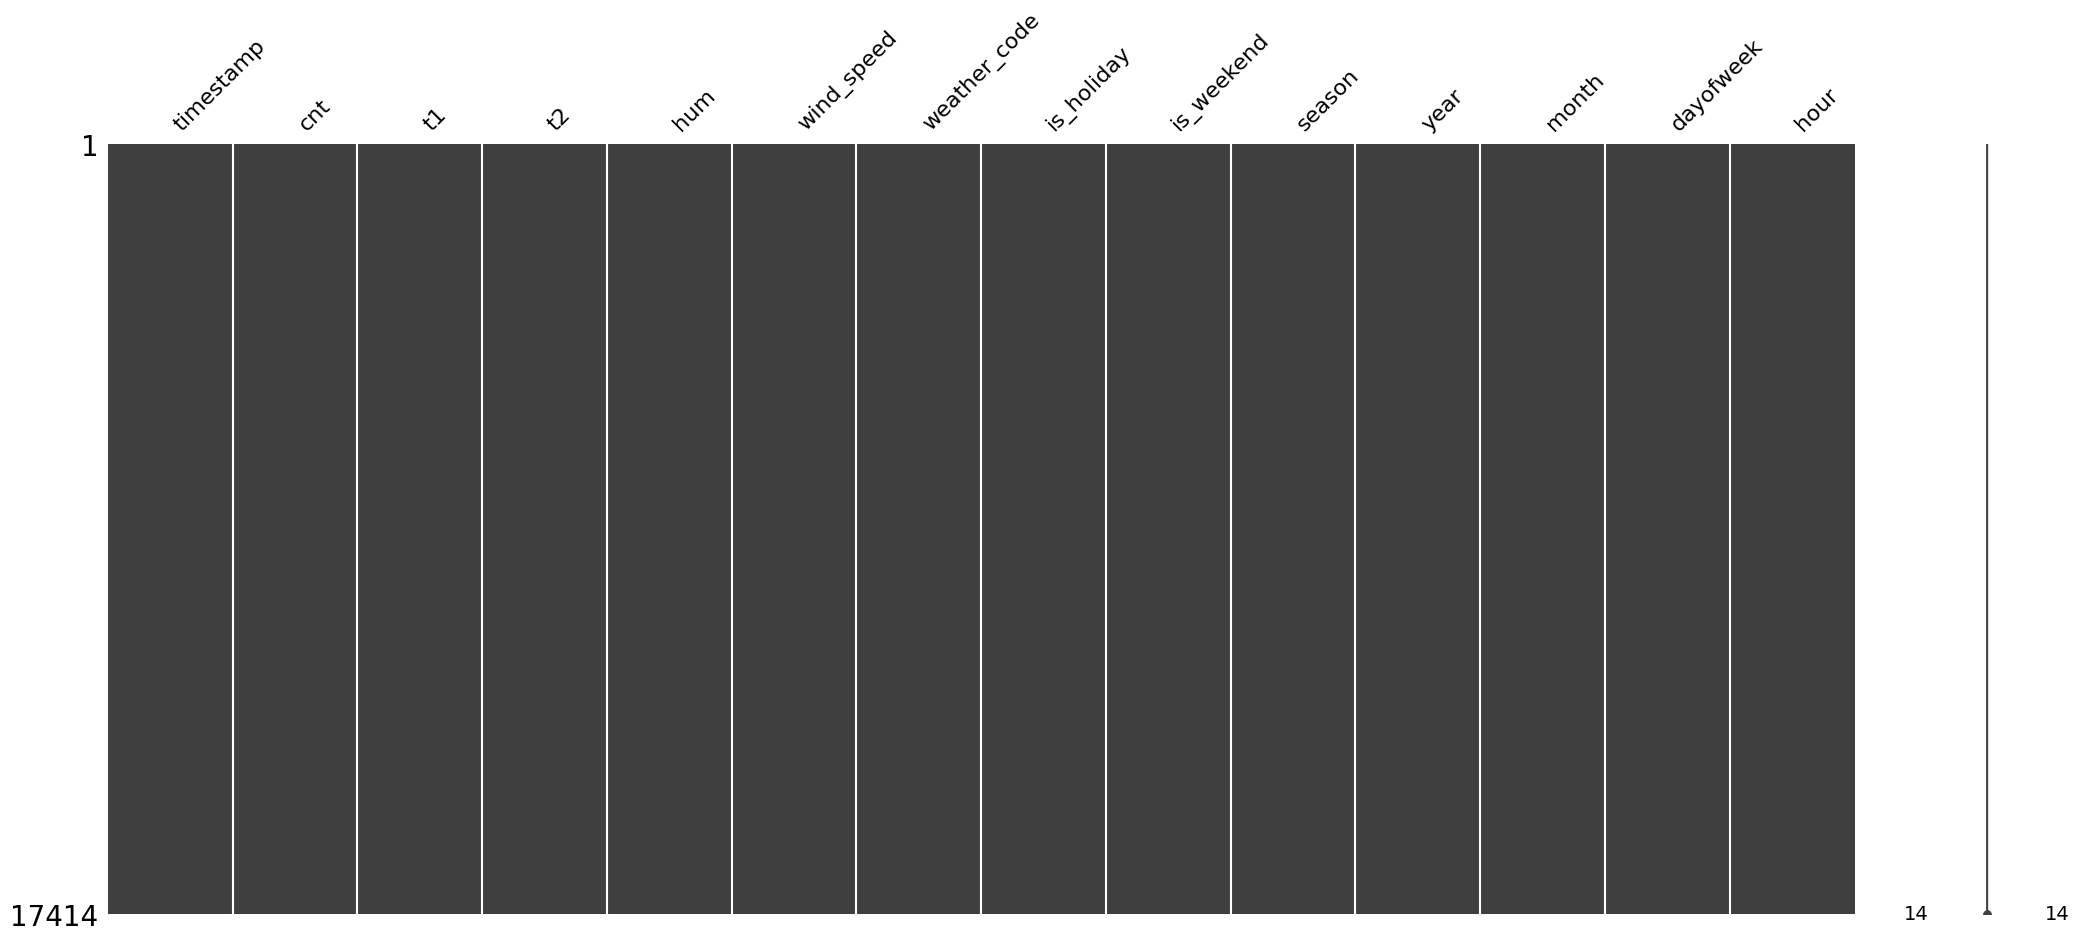

In [10]:
msno.matrix(df)
plt.show()# 결측치가 없어서 모두 검정으로 나옴

In [11]:
df['year'] = df['timestamp'].dt.year # 티임스탬프 년도 추출 year열 만들어서 추가
df['month'] = df['timestamp'].dt.month #월
df['dayofweek'] = df['timestamp'].dt.dayofweek #요일
df['hour'] = df['timestamp'].dt.hour # 시간
df.head()
#모델이 학습 할 수 있도록 많은 데이터를 추출하는것도 데이터 전처리 일부

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


탑색적 분석

In [12]:
df['year'].value_counts() # 데이터 구성확인

year
2016    8699
2015    8643
2017      72
Name: count, dtype: int64

In [13]:
df['month'].value_counts() # 데이터 구성확인

month
5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: count, dtype: int64

In [14]:
df['dayofweek'].value_counts() # 데이터 구성확인

dayofweek
0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: count, dtype: int64

In [15]:
df['weather_code'].value_counts() # weather_code 는 범주형 데이터 

#"weathe_code" category description:
#1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity0
#2 = scattered clouds / few clouds 
#3 = Broken clouds
#4 = Cloudy 
#7 = Rain/ light Rain shower/ Light rain 
#10 = rain with thunderstorm 
#26 = snowfall 
#94 = Freezing Fog 

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

# 그래프 활용 탐색적 분석

In [20]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

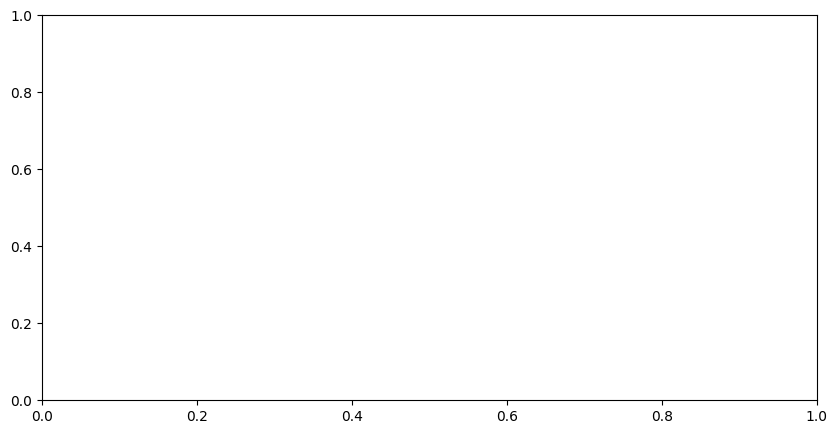

In [29]:
a,b = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(df['year'], df['cnt'])

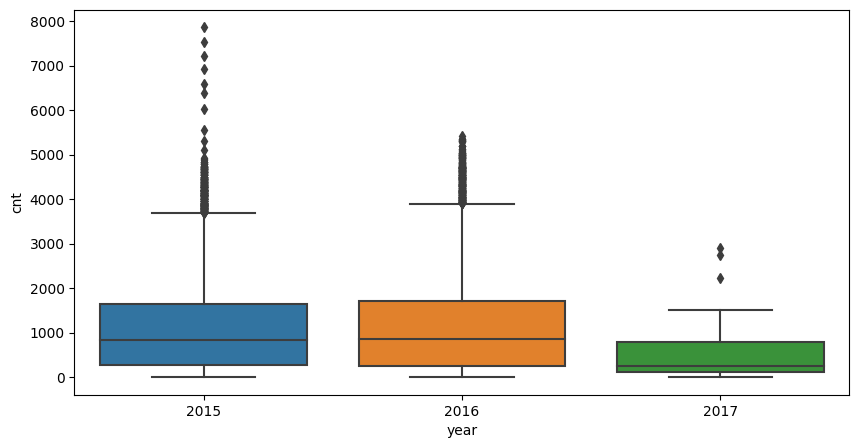

In [30]:
# df['year']와 df['cnt']를 x와 y로 지정하여 상자 그림을 그립니다
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['year'], y=df['cnt'])
plt.show()
# max , 중위값, min 값 , 이상치
# 연도에 따라 다르고 17년도 부터는 자전거 이용객이 적다

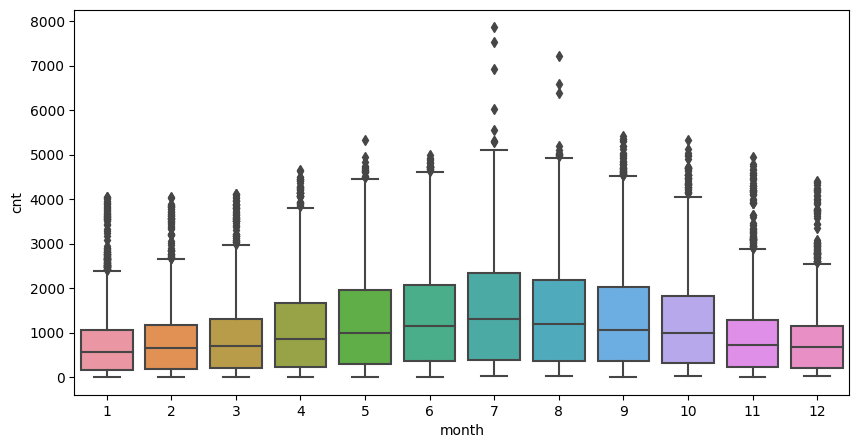

In [31]:
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['month'], y=df['cnt'])
plt.show()
# 월별

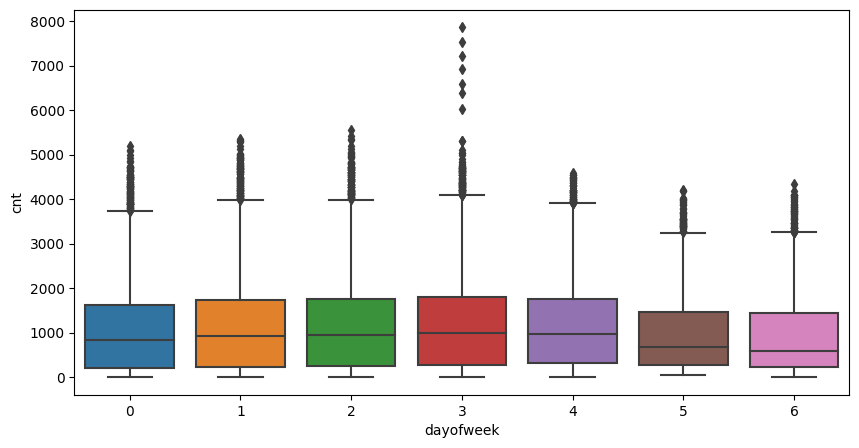

In [32]:
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['dayofweek'], y=df['cnt'])
plt.show()
# 요일

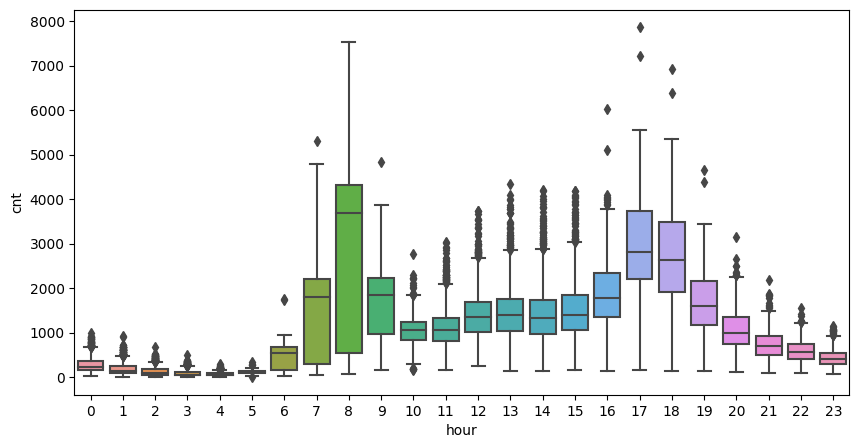

In [33]:
plt.figure(figsize=(10, 5))  # figure 크기 설정
sns.boxplot(x=df['hour'], y=df['cnt'])
plt.show()
# 시간 
#출퇴근 이용 때문에 평일에 더많은듯

In [38]:
# 단축키 만들듯이 변수
# 그래프 함수 만들기

def plot_bar(data,feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature,y='cnt',data=data,palette='Set3',orient='v')
    
# orient v 소문자로

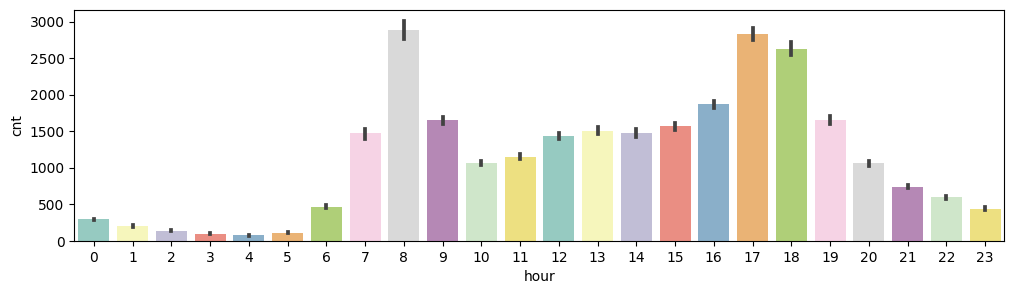

In [39]:
plot_bar(df,'hour')

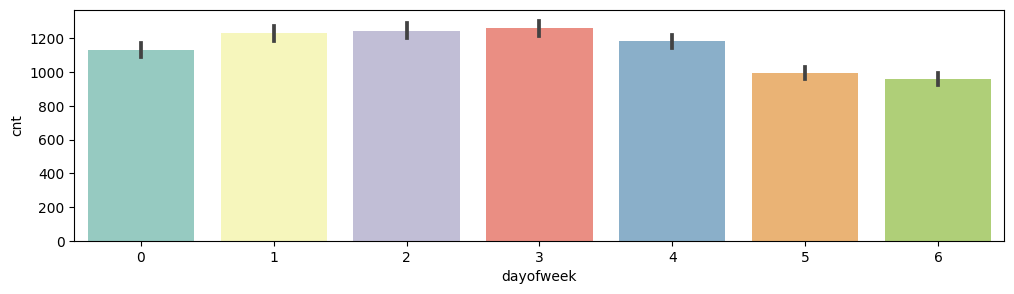

In [40]:
plot_bar(df,'dayofweek')

# 데이터 전처리

In [ ]:
# 이상치 제거 (아웃라이어 제거)
# 함수 생성해서 작업 해보자
def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)